Author: Irfan RIzki Saputra

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

## Disclaimer

rubah direktori .csv file pada df bila tidak bisa diproses, dan bila buka pakai offline jupyter pastikan numpy, pandas, matplotlib, dan seaborn terinstal. terimakasih

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Salinan loan_customer.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


# Data Cleansing

Untuk *data cleansing*, kita akan *handle 3 bad data*, yaitu : *missing value, duplicate data, dan outlier.*

## Handling missing values

### 1. df.info()

`df.info()` digunakan untuk cek apakah masih ada *value* yang *null* di setiap *column* dan menunjukan tipe data setiap *column*.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

  Dari data tersebut menunjukkan, dari total 621 data, dan 17 parameter, masih terdapat data kosong pada 11 parameter yaitu: 
`birth_date`, `phone_number`, `gender`, `married`, `dependents`, `education`, `self_employed`, `applicant_income`, `credit_history`, `has_credit_card`, `property_type`.

### 2. Memisahkan Categorical dan Numerical

Untuk mempermudah handling, kita pisahkan dahulu data string/categorical dan numerik.

In [ ]:
# memisahkan categorical dan numerical
cats =['loan_id', 'birth_date', 'gender', 'married', 'dependents', 'education', 'self_employed', 'has_credit_card' , 'property_type', 'loan_status']
nums =['phone_number', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

### 3. df.fillna()

Kemudian kita rubah *missing value* dengan `df.fillna()` :
1. rubah data *categorical* yang kosong/ missing value menjadi NaN.
2. rubah *missing value* `phone_number` menjadi angka 0.
3. untuk `applicant income` rubah *missing value* nya menjadi *mean*. 
4. pada `credit_history` rubah *missing value* menjadi 0, karena opsinya hanya 0 dan 1.

In [ ]:
cats_na ={'loan_id':'NaN', 'birth_date':'NaN', 'gender':'NaN', 'married':'NaN', 'dependents':'NaN', 'education':'NaN', 'self_employed':'NaN', 'has_credit_card' :'NaN', 'property_type':'NaN', 'loan_status':'NaN'}
df.fillna(value=cats_na, inplace = True)
df['phone_number'].fillna(0, inplace= True)
df['applicant_income'].fillna(df['applicant_income'].mean(), inplace= True)
df['credit_history'].fillna(0, inplace= True)

setelah itu `df.info()` untuk cek lagi apakah masih ada missing value.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          621 non-null    object 
 2   phone_number        621 non-null    float64
 3   gender              621 non-null    object 
 4   married             621 non-null    object 
 5   dependents          621 non-null    object 
 6   education           621 non-null    object 
 7   self_employed       621 non-null    object 
 8   applicant_income    621 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      621 non-null    float64
 14  has_credit_card     621 non-null    object 
 15  property_type       621 non-null    object 
 16  loan_sta

data tersebut menunjukkan semua *feature* *621 non-null*, berarti sudah tidak ada *missing value* pada seluruh data. 

## Handling duplicated data

### df.drop_duplicates()

df.drop_duplicates(), akan otomatis hapus data yang identik di semua fitur/kolom.

In [ ]:
np.where(df.duplicated()==True)

(array([279]),)

Dari data tersebut terlihat terdapat duplikat pada baris index[279], maka kita hapus baris index[279].



In [ ]:
df.drop_duplicates(inplace=True)
len(df.index)

620

baris index [279] sudah terhapus, sekarang tersisa 620 baris, dari yang semula 621 baris.

### 2. df.describe()

In [ ]:
df.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,6.200000e+02,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,5.017707e+11,5685.707970,1617.385355,145238.709677,342.580645,28.548387,0.772581
std,2.428331e+11,8997.142778,2917.401007,84038.116121,64.138770,5.344898,0.419504
min,0.000000e+00,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281113e+11,2880.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281314e+11,3854.000000,1149.000000,125500.000000,360.000000,30.000000,1.000000
75%,6.285643e+11,5785.000000,2303.000000,165250.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


dari data tersebut terlihat anomali yaitu nilai `max` pada `applicant_income` selisih jauh terhadap `50%` ataupun `mean`.*


In [ ]:
df[cats].describe()

,loan_id,birth_date,gender,married,dependents,education,self_employed,has_credit_card,property_type,loan_status
count,620,620,620,620,620,620,620,620,620,620
unique,616,542,3,3,5,3,3,3,4,2
top,LP002277,NaN,Male,Yes,0,Graduate,No,NaN,apartment,APPROVE
freq,2,49,494,402,348,484,505,532,235,425


disini terdapat lagi anomali yaitu *duplicate value* pada `loan_id` , yang mana `loan_id` seharusnya kode unik yang tidah bisa diduplikasi. dan terjadi pula duplikat pada `birth_date` yang perlu kita investigasi lebih lanjut.

### 3. Duplikat pada birth_date

In [ ]:
df[df['birth_date'].duplicated()==True]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
25,LP001066,NaN,6.281156e+11,Male,Yes,0,Graduate,Yes,9560.0,0.0,191000,360,30,1.0,NaN,apartment,APPROVE
38,LP001114,NaN,6.281125e+11,Male,No,0,Graduate,No,4166.0,7210.0,184000,360,30,1.0,NaN,house,APPROVE
52,LP001164,NaN,6.281182e+11,Female,No,0,Graduate,No,4230.0,0.0,112000,360,30,1.0,NaN,apartment,REJECT
61,LP001206,NaN,6.281163e+11,Male,Yes,3+,Graduate,No,3029.0,0.0,99000,360,30,1.0,NaN,house,APPROVE
63,LP001213,NaN,6.281113e+11,Male,Yes,1,Graduate,No,4945.0,0.0,100000,360,30,0.0,NaN,studio,REJECT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002925,NaN,6.285680e+11,NaN,No,0,Graduate,No,4750.0,0.0,94000,360,30,1.0,NaN,apartment,APPROVE
606,LP002949,NaN,6.285632e+11,Female,No,3+,Graduate,NaN,416.0,41667.0,350000,180,15,0.0,NaN,house,REJECT
609,LP002953,NaN,6.281189e+10,Male,Yes,3+,Graduate,No,5703.0,0.0,128000,360,30,1.0,NaN,house,APPROVE
613,LP002961,1983-02-14,6.285659e+10,Male,Yes,1,Graduate,No,3400.0,2500.0,173000,360,30,1.0,yes,apartment,APPROVE


In [ ]:
for i in np.where(df['birth_date']=='NaN'):
  print(f'Jumlah NaN birth_date = {len(i)}')

Jumlah NaN birth_date = 49


dari jumlah duplikat pada `birth_date` ada sebanyak 78 masih wajar karena terdapat 49 yang memiliki value 'NaN'.

### 4. Duplikat pada loan_id

In [ ]:
df[df['loan_id'].duplicated()==True]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,NaN,apartment,APPROVE
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,NaN,house,REJECT


dari data tersebut didapat kan 4 `loan_id` yang duplikat, sebelum menghapus cek data apakan yang berbeda selain `loan_id` nya dengan cek setiap ID yang duplikat.

In [ ]:
df[df['loan_id']== "LP001310"]


,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,...,property_type,loan_status,gender_new,married_new,dependents_new,education_new,self_employed_new,has_credit_card_new,property_type_new,loan_status_new
89,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,...,apartment,APPROVE,1,2,0,0,1,0,1,0
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,...,apartment,APPROVE,1,2,0,0,1,1,1,0


In [ ]:
df[df['loan_id']== "LP001990"]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,...,property_type,loan_status,gender_new,married_new,dependents_new,education_new,self_employed_new,has_credit_card_new,property_type_new,loan_status_new
307,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,...,house,REJECT,1,1,0,2,1,0,2,1
308,LP001990,1980-08-03,6.285279e+11,Male,No,0,Not Graduate,No,2000.0,0.0,...,house,REJECT,1,1,0,2,1,2,2,1


In [ ]:
df[df['loan_id']== "LP002160"]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,...,property_type,loan_status,gender_new,married_new,dependents_new,education_new,self_employed_new,has_credit_card_new,property_type_new,loan_status_new
362,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,...,apartment,APPROVE,1,2,3,0,1,2,1,0
363,LP002160,1990-11-27,6.281153e+11,Male,Yes,3+,Graduate,No,5167.0,3167.0,...,apartment,APPROVE,1,2,3,0,1,0,1,0


In [ ]:
 df[df['loan_id']== "LP002277"]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,...,property_type,loan_status,gender_new,married_new,dependents_new,education_new,self_employed_new,has_credit_card_new,property_type_new,loan_status_new
400,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,...,house,REJECT,0,1,0,0,1,2,2,1
401,LP002277,1972-06-12,6.281384e+11,Female,No,0,Graduate,No,3180.0,0.0,...,house,REJECT,0,1,0,0,1,0,2,1


Nah, dari sini terlihat bahwa terdapat duplikat data pada keempat data tersebut, yang membedakan hanya pada `has_no_credit` nya saja, sehingga duplikat `loan_id` bisa kita fix dengan cara hapus salah satu baris index yang duplikat. 

In [ ]:
for i in np.where(df['loan_id'].duplicated()==True):
  df.drop(i, inplace=True)
len(df.index)

`loan_id` yang duplikat telah terhapus, sekarang tersisa 616 baris, dari yang semula 620 baris.

## Handling Outlier

### 1. box Plot

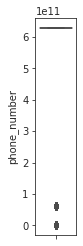

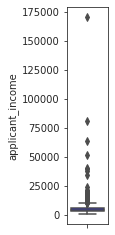

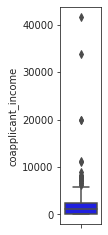

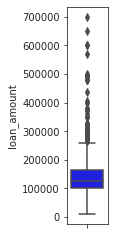

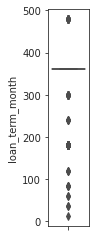

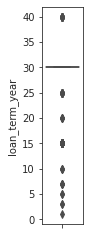

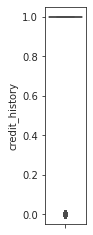

In [ ]:
sns.set_style('ticks')

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]],orient= 'y', color='blue')
    plt.show()

Dari box plot tersebut ada 3 poin yang bisa kita perhatikan yaitu:
1. `phone_number` dengan nilai <6, 
2. `applicant_income` dengan nilai <100000, 
3. `coaplicant_income` dengan nilai <15000.

kita bisa mengetahui dengan `df[df['*feature']*condition]` berikut:

### 2. phone_number outlier

In [ ]:
df[df['phone_number']<6]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
16,LP001034,1987-11-17,0.0,Male,No,1,Not Graduate,No,3596.00000,0.0,100000,240,20,0.0,no,house,APPROVE
37,LP001112,1988-09-03,0.0,Female,Yes,0,Graduate,No,3667.00000,1459.0,144000,360,30,1.0,NaN,apartment,APPROVE
56,LP001195,1986-07-23,0.0,Male,Yes,0,Graduate,No,2132.00000,1591.0,96000,360,30,1.0,NaN,apartment,APPROVE
67,LP001233,1987-01-14,0.0,Male,Yes,1,Graduate,No,10750.00000,0.0,312000,360,30,1.0,NaN,house,APPROVE
98,LP001333,NaN,0.0,Male,Yes,0,Graduate,No,1977.00000,997.0,50000,360,30,1.0,no,apartment,APPROVE
101,LP001345,1988-06-22,0.0,Male,Yes,2,Not Graduate,No,4288.00000,3263.0,133000,180,15,1.0,NaN,house,APPROVE
111,LP001385,1980-04-23,0.0,Male,No,0,Graduate,No,5316.00000,0.0,136000,360,30,1.0,no,house,APPROVE
113,LP001391,1990-10-12,0.0,Male,Yes,0,Not Graduate,No,3572.00000,4114.0,152000,360,30,0.0,NaN,studio,REJECT
121,LP001426,1983-10-21,0.0,Male,Yes,NaN,Graduate,No,5667.00000,2667.0,180000,360,30,1.0,NaN,studio,APPROVE
129,LP001451,1992-03-30,0.0,Male,Yes,1,Graduate,Yes,10513.00000,3850.0,160000,180,15,0.0,NaN,house,REJECT


dari syntax tersebut menunjukkan terdapat sebanyak 52 *outlier* pada `phone_number` dengan range >6, tetapi semuanya bernilai value '0' yang kebanyakan dari *handling missing value*.


### 3. applicant_income outlier

In [ ]:
df[df['applicant_income'] >100000]


Dari *value*nya sama dengan yang sudah ditemukan dari `df.describe()` sebelumnya. ada 2 kemungkinan dia adalah konglomerat/Pejabat mungkin?(-:) atau bisa jadi *typo* dalam input.
  yuk mari lanjut cek outlier pada `coapplicant_income`.

### 4. coapplicant_income outlier

In [ ]:
df[df['coapplicant_income'] >15000]

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
407,LP002297,1980-06-23,6.285739e+10,Male,No,0,Graduate,No,2500.0,20000.0,103000,360,30,1.0,NaN,apartment,APPROVE
422,LP002342,NaN,6.285679e+11,Male,Yes,2,Graduate,Yes,1600.0,20000.0,239000,360,30,1.0,NaN,house,REJECT
586,LP002893,1979-05-08,6.281105e+11,Male,No,0,Graduate,No,1836.0,33837.0,90000,360,30,1.0,NaN,house,REJECT
606,LP002949,NaN,6.285632e+11,Female,No,3+,Graduate,NaN,416.0,41667.0,350000,180,15,0.0,NaN,house,REJECT


*outlier* pada `coapplicant_income` pada 4 data tersebut masih *make sense*, tidak terlihat perbedaan yang begitu ekstrim.

## Feature Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# buat fitur baru dan akan kita rubah Dtype object menjadi category 
df['gender_new']=df['gender'].astype('category').cat.codes
df['married_new']=df['married'].astype('category').cat.codes
df['dependents_new']=df['dependents'].astype('category').cat.codes
df['education_new']=df['education'].astype('category').cat.codes
df['self_employed_new']=df['self_employed'].astype('category').cat.codes
df['has_credit_card_new']=df['has_credit_card'].astype('category').cat.codes
df['property_type_new']=df['property_type'].astype('category').cat.codes
df['loan_status_new']=df['loan_status'].astype('category').cat.codes

#Create an instance of One-hot-encoder
enc=OneHotEncoder()


In [ ]:
df.sample(5)

In [ ]:
# Membuat mapping table untuk mendapatkan value yang telah di encoding(value asli) 
gender_map = pd.DataFrame({'gender value' : df['gender'].unique(),'gender code' : df['gender_new'].unique()})
married_map = pd.DataFrame({'married value' : df['married'].unique(),'married code' : df['married_new'].unique()})
dependents_map = pd.DataFrame({'dependents value' : df['dependents'].unique(),'dependents code' : df['dependents_new'].unique()})
education_map = pd.DataFrame({'education value' : df['education'].unique(),'education code' : df['education_new'].unique()})
self_employed_map = pd.DataFrame({'self_employed value' : df['self_employed'].unique(),'self_employed code' : df['self_employed_new'].unique()})
has_credit_card_map = pd.DataFrame({'has_credit_card value' : df['has_credit_card'].unique(),'has_credit_card code' : df['has_credit_card_new'].unique()})
property_type_map = pd.DataFrame({'property_type value' : df['property_type'].unique(),'property_type code' : df['property_type_new'].unique()})
loan_status_map = pd.DataFrame({'loan_status value' : df['loan_status'].unique(),'loan_status code' : df['loan_status_new'].unique()}),
print('contoh :\nGender Map\n')
gender_map

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

### 1. Tabel


In [ ]:
df.groupby(["property_type", "gender"])["loan_id"].count()

property_type  gender
NaN            Male        1
apartment      Female     55
               Male      174
               NaN         6
house          Female     34
               Male      168
               NaN         3
studio         Female     24
               Male      151
               NaN         4
Name: loan_id, dtype: int64

### 2. Bar chart

Untuk membuat *Bar chart* kita bisa gunakan tabel diatas sebagai sumbernya.

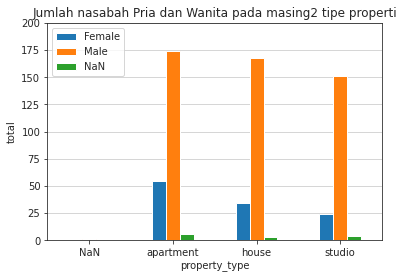

In [ ]:
# membuat variabel dari tabel awal
property_to_gender = df.groupby(["property_type", "gender"])["loan_id"].count()
# merubah variabel menjadi pivot 
pivot = property_to_gender.unstack()

# rubah pivot menjadi grouping Bar chart

ax = pivot.plot(kind='bar')

ax.set_ylabel('total')
ax.set_title('Jumlah nasabah Pria dan Wanita pada masing2 tipe properti')
ax.legend(loc='upper left')
ax.set_ylim(0, 200)
ax.yaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

jika ingin tidak menmpilkan **NaN**, maka pada `property_to_gender` rubah `df` di dalamnya menjadi`df[df['gender'] != 'NaN']` untuk hilangkan **NaN** pada gender. atau `df[(df['property_type'] != 'NaN'& df['gender'] != 'NaN')]` untuk menghilangkan **NaN** kedua *feature* tsb.

In [ ]:
#Try yourself, hehe
#  type code here

### 3. Tabel 2

Sekarang coba kita balik, bagaimana minat tipe properti pada pria dan minat pada wanita. 

In [ ]:
df[df['gender'] !='NaN'].groupby(["gender","property_type"])["loan_id"].count()

gender  property_type
Female  apartment         55
        house             34
        studio            24
Male    NaN                1
        apartment        174
        house            168
        studio           151
Name: loan_id, dtype: int64

### 4. Pie Chart


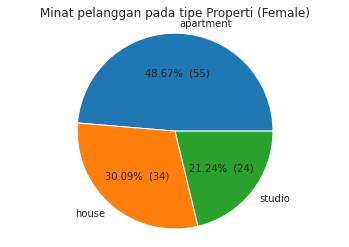

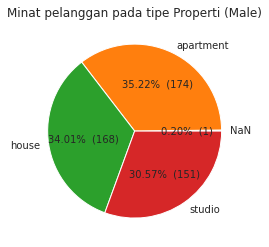

In [ ]:
# Memisahkan 2 gender agar menjadi Pie chart berbeda
Female_df= df[(df['gender'] == 'Female')]
Male_df= df[(df['gender'] == 'Male')]

# Membuat pivot dari df yg sudah dipisah berdasarkan gender
Female_pivot = Female_df.groupby('property_type')['loan_id'].count()
Male_pivot = Male_df.groupby('property_type')['loan_id'].count()

# Rubah persentase menjadi persentase(nilai) pada isi pie chart.
def make_autopct(Female_pivot):
    def my_autopct(pct):
        total = sum(Female_pivot)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(Male_pivot):
    def my_autopct(pct):
        total = sum(Male_pivot)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plot female pie chart
plt.pie(Female_pivot, labels=Female_pivot.index, autopct=make_autopct(Female_pivot))
plt.title('Minat pelanggan pada tipe Properti (Female)')
plt.axis('equal')
plt.show()

# Plot male pie chart
plt.pie(Male_pivot, labels=Male_pivot.index, autopct=make_autopct(Male_pivot))
plt.title('Minat pelanggan pada tipe Properti (Male)')
plt.show()




### 5. Kesimpulan


Dari analisa tersebut dapat disimpulkan:
1. berdasarkan *bar chart*, pada setiap tipe properti minat pria lebih banyak 3x (bahkan lebih) dibandingkan wanita.
2. berdasarkan *pie chart*, Wanita lebih dominan berminat pada `Apartemen`(49%) dibandingkan properti lain.
3. berdasarkan *pie chart*, minat tipe properti Pria hampir merata antara `Apartemen`(35%), `Rumah`(34%), dan `Studio`(31%).

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

### 1. Tabel 

Seperti sebelumnya kita buat tabel Grupby dahulu. kali ini kita grup bedasarkan `married` dan `loan_term_year` dengan syarat `loan_status` adalah `APPROVE`.

In [ ]:
df[df['loan_status']== 'APPROVE'].groupby(["married","loan_term_year"])["loan_id"].count().reset_index(name='count')

,married,loan_term_year,count
0,NaN,20,1
1,NaN,30,1
2,NaN,40,1
3,No,5,1
4,No,10,1
5,No,15,4
6,No,20,1
7,No,25,1
8,No,30,124
9,No,40,2


### 2. Scatter Plot

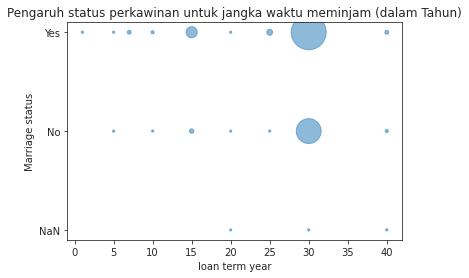

In [ ]:
df_plot = df[df['loan_status']== 'APPROVE'].groupby(["married","loan_term_year"])["loan_id"].count().reset_index(name='count')

plt.scatter(df_plot['loan_term_year'],df_plot['married'], s=df_plot['count']*5, alpha=0.5)
plt.ylabel('Marriage status')
plt.xlabel('loan term (year)')
plt.title('Pengaruh status perkawinan untuk jangka waktu meminjam (dalam Tahun)')
plt.show()

### 3. Kesimpulan

Dari analisa tersebut dapat disimpulkan:
1. baik status sudah/belum menikah sama-sama dominan mendapatkan jangka waktu 30 tahun.
